In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_squared_error, mean_absolute_error,cohen_kappa_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
!pip install catboost

In [2]:
app=pd.read_csv(r"C:\Users\BHOOMISH\OneDrive\Desktop\application_record.csv")
app

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [3]:
credit=pd.read_csv(r"C:\Users\BHOOMISH\OneDrive\Desktop\credit_record.csv")
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [4]:
app.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [5]:
app["OCCUPATION_TYPE"].fillna(value="other",inplace=True)

In [6]:
app.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [7]:
app.duplicated().sum()

0

In [8]:
credit.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [9]:
credit.duplicated().sum()

0

In [10]:
credit["STATUS"].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [11]:
credit["target"]=credit["STATUS"]
credit["target"].replace("X",0,inplace=True)#replacing x with o
credit["target"].replace("C",0,inplace=True)#replacingc with 0
credit["target"]=credit["target"].astype(int)#column type from object to integer
credit.loc[credit["target"]>1,"target"]=1

In [12]:
credit.drop("STATUS",axis=1,inplace=True)

In [13]:
credit

,ID,MONTHS_BALANCE,target
0,5001711,0,0
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,0
...,...,...,...
1048570,5150487,-25,0
1048571,5150487,-26,0
1048572,5150487,-27,0
1048573,5150487,-28,0


In [14]:
new=pd.merge(app,credit,how="inner",on=["ID"])
new

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,-1,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,-2,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,-3,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,1
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [15]:
new["AGE_YEARS"]=round(-new["DAYS_BIRTH"]/365,0)
new["YEARS_EMPLOYED"]=round(-new["DAYS_EMPLOYED"]/365,0)

In [16]:
new["MONTH_BALANCE"]=round(-new["MONTHS_BALANCE"]*1,0)
new

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,target,AGE_YEARS,YEARS_EMPLOYED,MONTH_BALANCE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,other,2.0,0,0,33.0,12.0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,other,2.0,-1,0,33.0,12.0,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,other,2.0,-2,0,33.0,12.0,2
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,other,2.0,-3,0,33.0,12.0,3
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,other,2.0,-4,0,33.0,12.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-9,0,25.0,3.0,9
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-10,1,25.0,3.0,10
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-11,1,25.0,3.0,11
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-12,0,25.0,3.0,12


In [17]:
new.drop(["DAYS_BIRTH","DAYS_EMPLOYED","MONTHS_BALANCE"],axis=1,inplace=True)

In [18]:
new

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,AGE_YEARS,YEARS_EMPLOYED,MONTH_BALANCE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,other,2.0,0,33.0,12.0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,other,2.0,0,33.0,12.0,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,other,2.0,0,33.0,12.0,2
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,other,2.0,0,33.0,12.0,3
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,other,2.0,0,33.0,12.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1,0,0,0,Laborers,1.0,0,25.0,3.0,9
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1,0,0,0,Laborers,1.0,1,25.0,3.0,10
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1,0,0,0,Laborers,1.0,1,25.0,3.0,11
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1,0,0,0,Laborers,1.0,0,25.0,3.0,12


In [19]:
new.drop(["FLAG_MOBIL","FLAG_WORK_PHONE","FLAG_PHONE","FLAG_EMAIL"],axis=1, inplace=True)

In [20]:
new.drop(["FLAG_OWN_CAR","FLAG_OWN_REALTY"],axis=1, inplace=True)

In [21]:
new

,ID,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,AGE_YEARS,YEARS_EMPLOYED,MONTH_BALANCE
0,5008804,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,0
1,5008804,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,1
2,5008804,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,2
3,5008804,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,3
4,5008804,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,Laborers,1.0,0,25.0,3.0,9
777711,5150337,M,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,Laborers,1.0,1,25.0,3.0,10
777712,5150337,M,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,Laborers,1.0,1,25.0,3.0,11
777713,5150337,M,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,Laborers,1.0,0,25.0,3.0,12


In [22]:
new = new.rename(columns={'CODE_GENDER': 'Gender',
                              'CNT_CHILDREN':'Num_children',
                               'AMT_INCOME_TOTAL':'Total_income','NAME_INCOME_TYPE':'Income_type',
                               'NAME_EDUCATION_TYPE':'Education_type','NAME_FAMILY_STATUS':'Family_status',
                               'NAME_HOUSING_TYPE':'Housing_type',
                               'OCCUPATION_TYPE':'Occupation_type',
                               'CNT_FAM_MEMBERS':'Num_family','target':'Target','ACCOUNT_LENGTH':'Account_length',
                                'AGE_YEARS':'Age','UNEMPLOYED':'Unemployed','YEARS_EMPLOYED':'Years_employed'})

In [23]:
new

,ID,Gender,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Num_family,Target,Age,Years_employed,MONTH_BALANCE
0,5008804,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,0
1,5008804,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,1
2,5008804,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,2
3,5008804,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,3
4,5008804,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,Laborers,1.0,0,25.0,3.0,9
777711,5150337,M,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,Laborers,1.0,1,25.0,3.0,10
777712,5150337,M,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,Laborers,1.0,1,25.0,3.0,11
777713,5150337,M,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,Laborers,1.0,0,25.0,3.0,12


In [24]:
for col in new.select_dtypes(include=['object']).columns:
  label_encoder=preprocessing.LabelEncoder()
  label_encoder.fit(new[col].unique())
  new[col]=label_encoder.transform(new[col])

In [25]:
new["MONTH_BALANCE"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60], dtype=int64)

<Axes: >

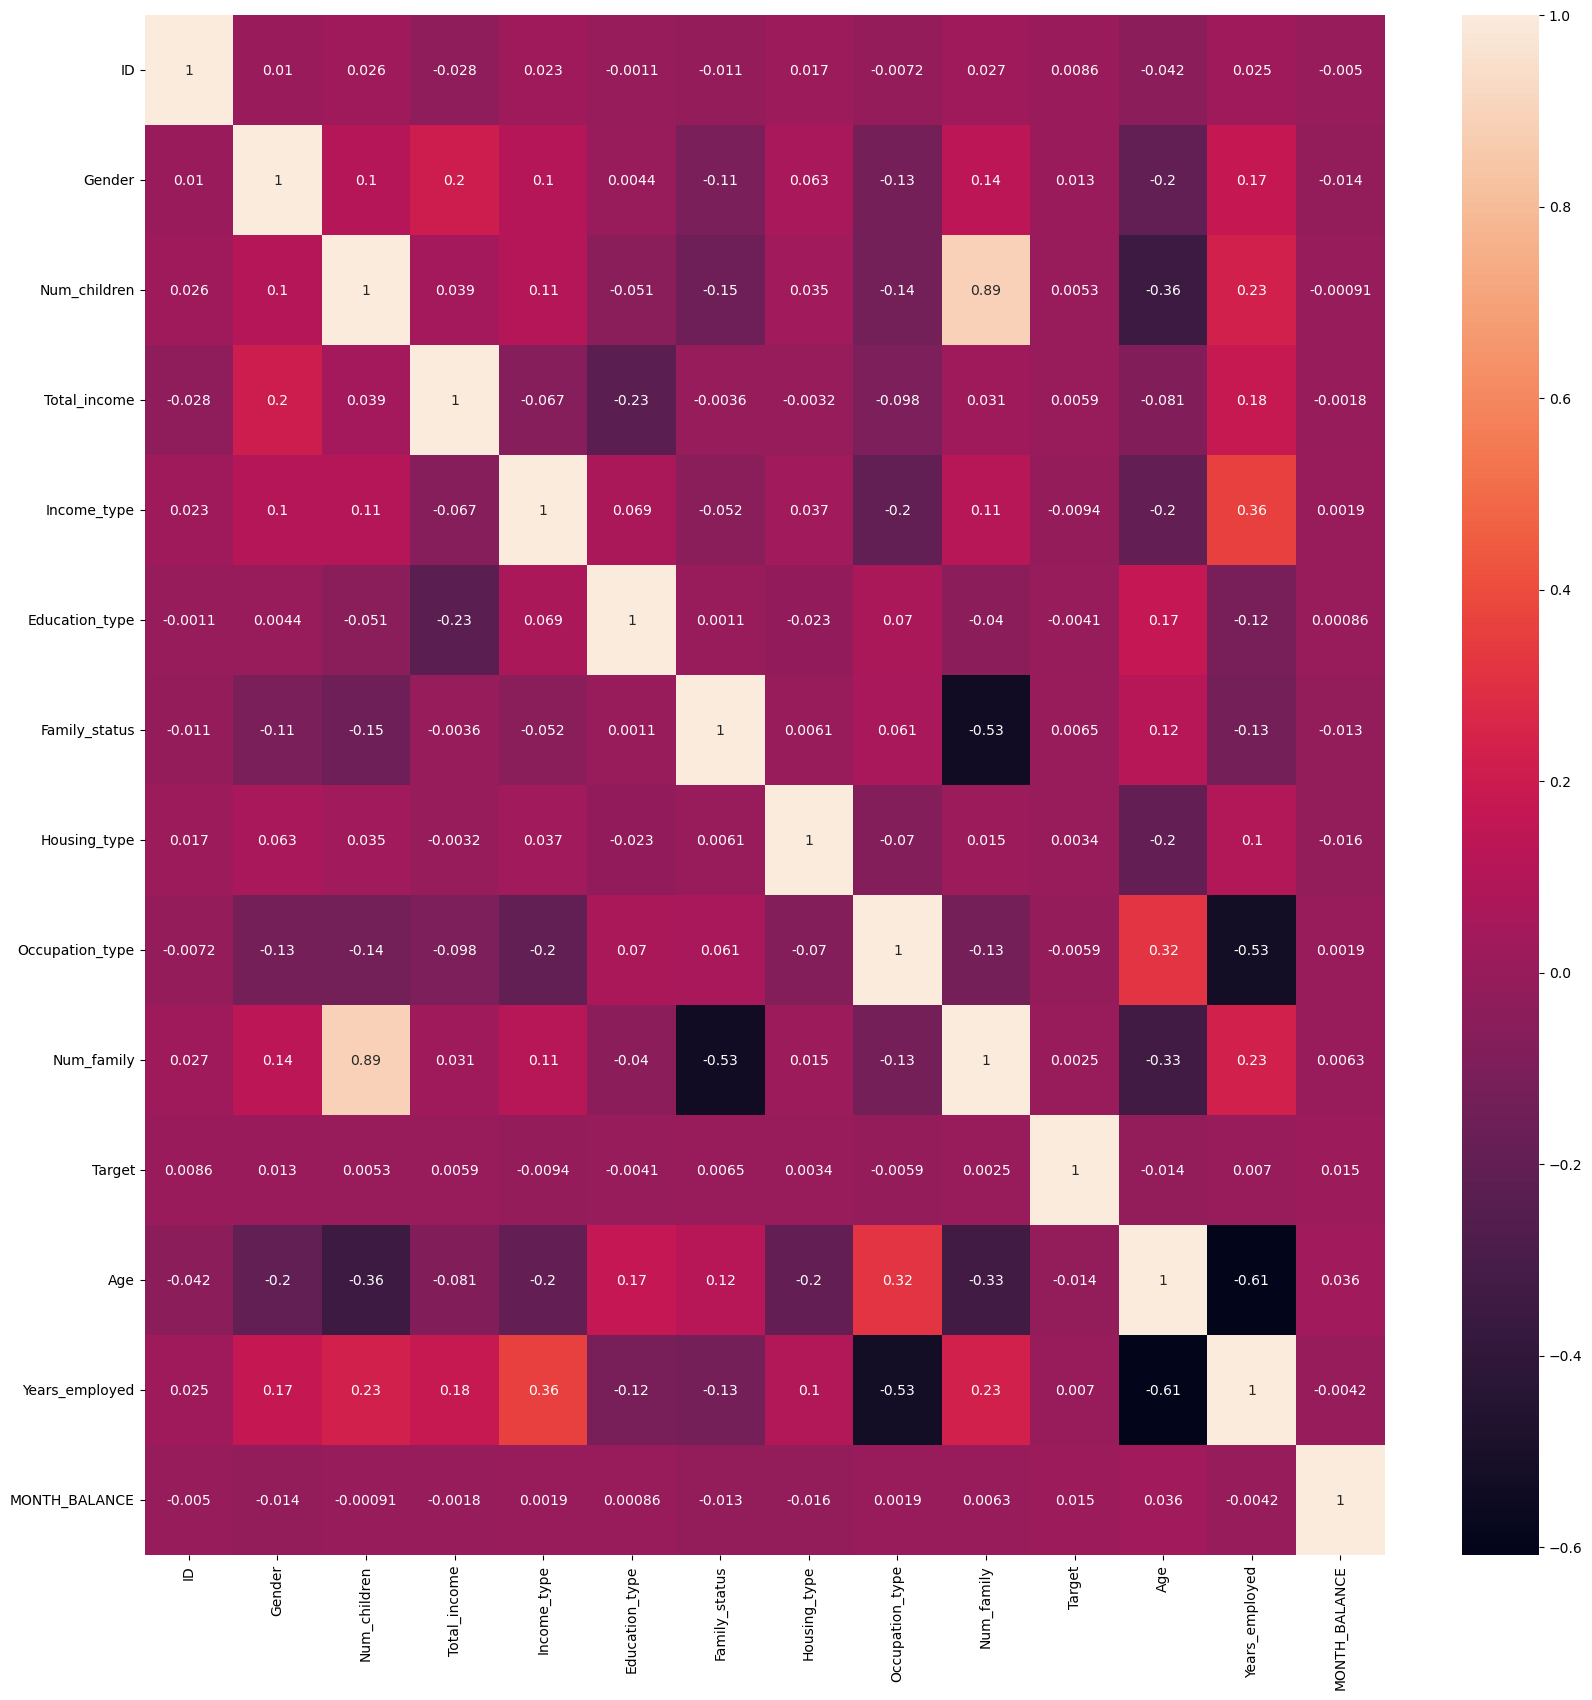

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(new.corr(),annot=True)

In [27]:
new.drop("Num_children",axis=1,inplace=True)

In [28]:
new.columns

Index(['ID', 'Gender', 'Total_income', 'Income_type', 'Education_type',
       'Family_status', 'Housing_type', 'Occupation_type', 'Num_family',
       'Target', 'Age', 'Years_employed', 'MONTH_BALANCE'],
      dtype='object')

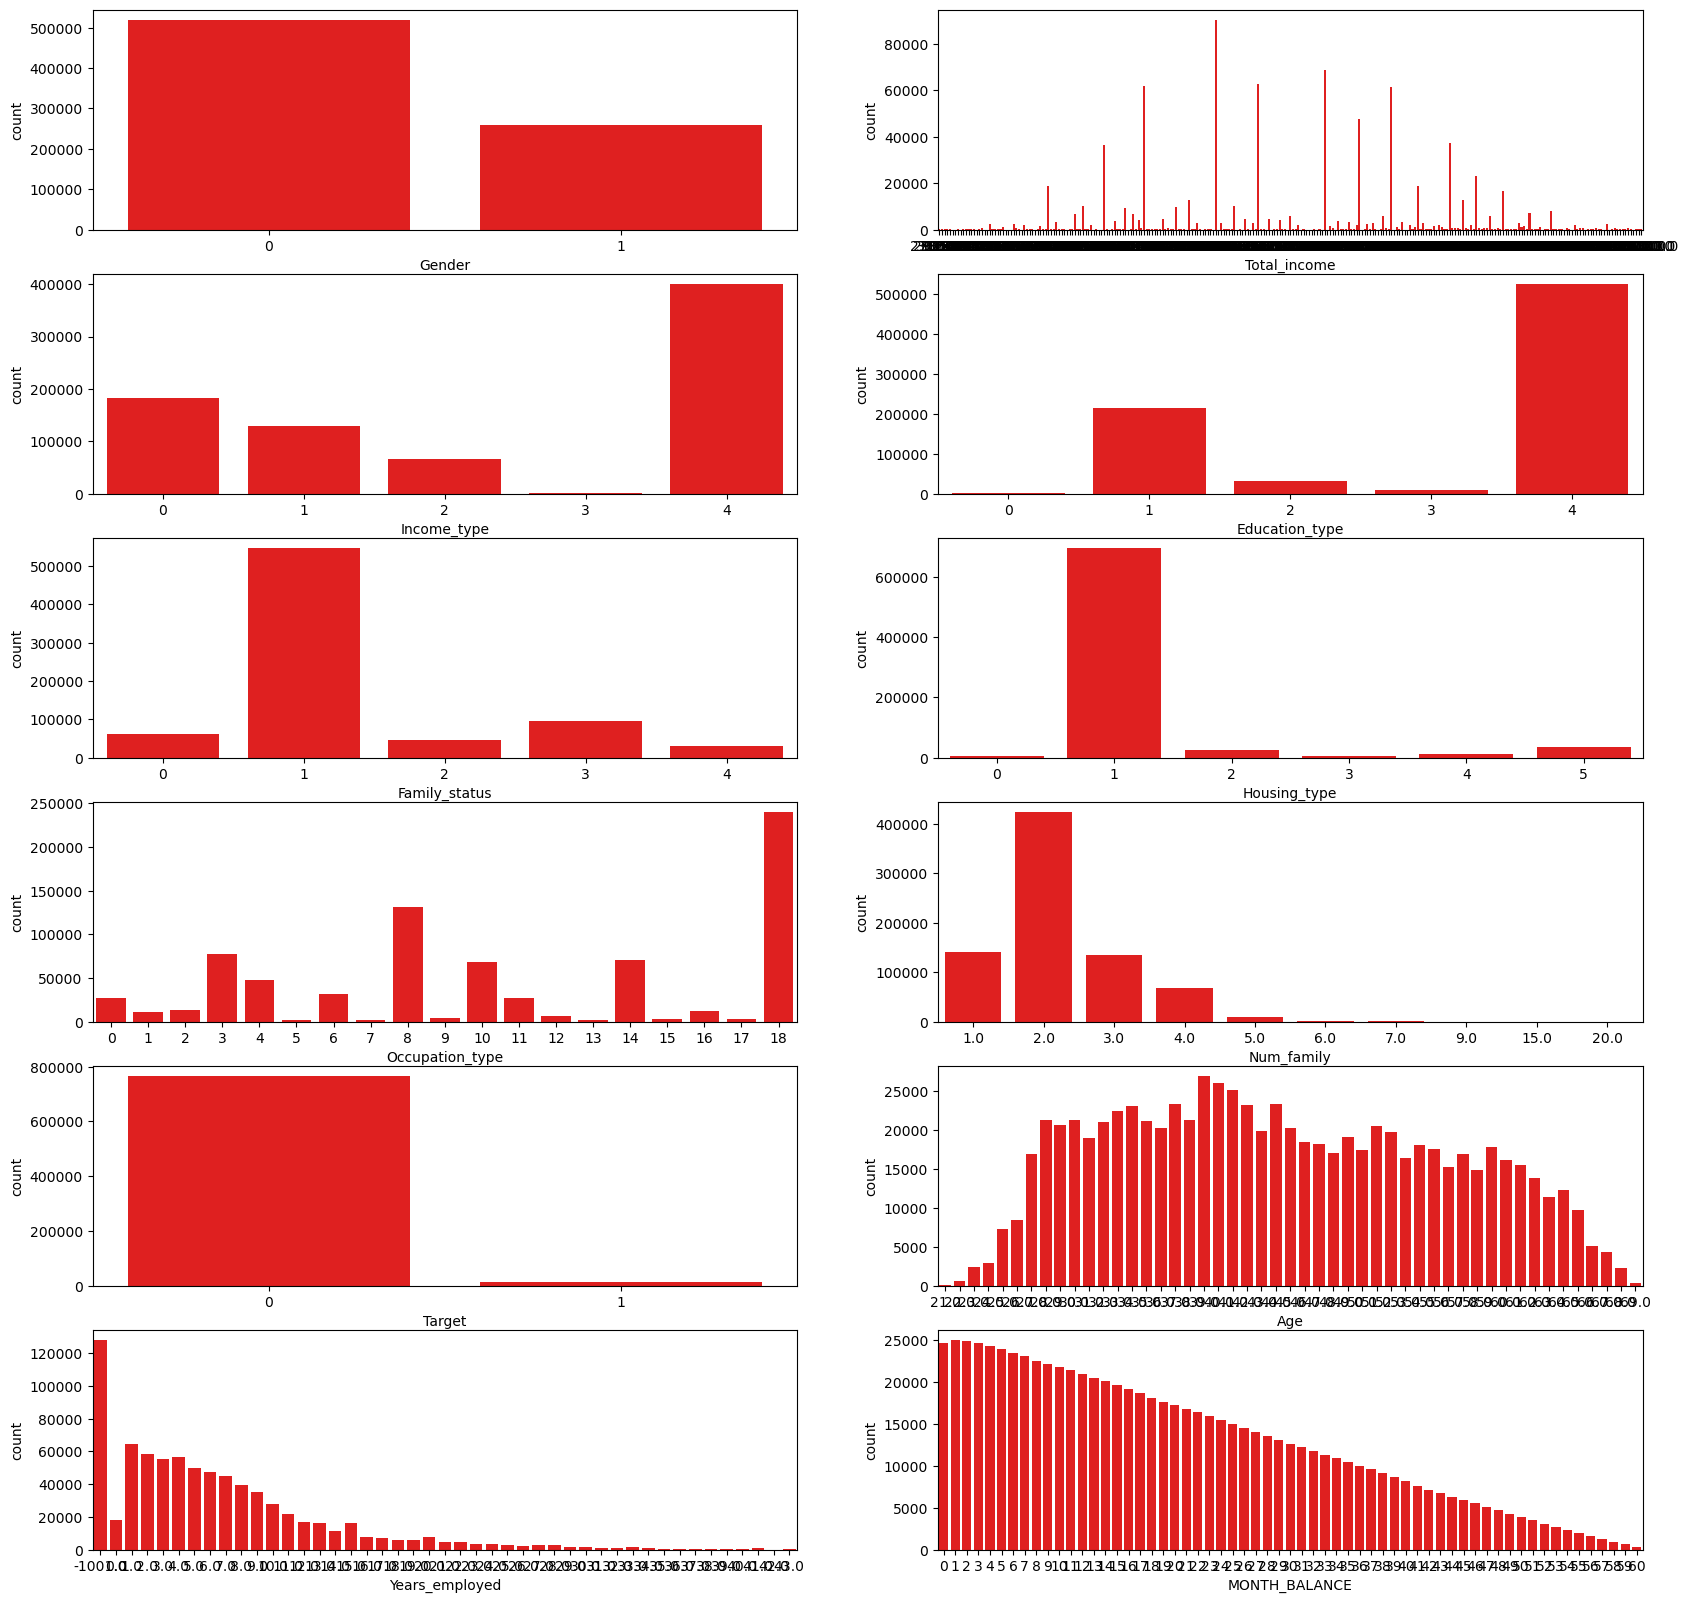

In [29]:
num_col=['Gender', 'Total_income', 'Income_type', 'Education_type','Family_status', 'Housing_type', 'Occupation_type', 'Num_family','Target', 'Age', 'Years_employed', 'MONTH_BALANCE']
plt.figure(figsize=(20,20))
for i, col in enumerate(num_col,1): # here for plot the index starts with 1 so we are assigning age column to 1
  plt.subplot(6,2,i)
  sns.countplot(data=new,x=col,color="red")
  plt.xlabel(col)
  plt.ylabel("count")

In [30]:
new.loc[new["Years_employed"]<0,'Years_employed']=0

In [31]:
new["Years_employed"].unique()

array([12.,  3.,  8.,  0.,  2.,  4.,  6.,  9., 19., 15.,  5., 13.,  7.,
       17., 30., 16., 11.,  1., 10., 24., 14., 25., 20., 27., 18., 21.,
       23., 22., 28., 39., 32., 33., 37., 26., 38., 31., 29., 35., 34.,
       41., 40., 36., 42., 43.])

# LOGISTIC REGRESSION

In [32]:
x=new[['ID', 'Gender', 'Total_income', 'Income_type', 'Education_type','Family_status', 'Housing_type', 'Occupation_type', 'Num_family', 'Age', 'Years_employed', 'MONTH_BALANCE']]
y=new["Target"]

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [34]:
model = LogisticRegression()#creating logisticregression model
model.fit(x_train,y_train)#training the model on training set
y_pred=model.predict(x_test)#make predictions on testing set

In [35]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
classification_reg=classification_report(y_test,y_pred)

print("accuracy : ",accuracy*100)
print("confusion matrix : ",conf_matrix)
print("classification regression : ", classification_reg)
kappa_score = cohen_kappa_score(y_test,y_pred)
print("kappa score",kappa_score)

accuracy :  98.53095285548048
confusion matrix :  [[153258      0]
 [  2285      0]]
classification regression :                precision    recall  f1-score   support

           0       0.99      1.00      0.99    153258
           1       0.00      0.00      0.00      2285

    accuracy                           0.99    155543
   macro avg       0.49      0.50      0.50    155543
weighted avg       0.97      0.99      0.98    155543

kappa score 0.0


C:\Users\BHOOMISH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BHOOMISH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BHOOMISH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# DECISION TREE

In [36]:
dec_tree = DecisionTreeClassifier()# decision tree classifier bcs it is not a continious data
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
y_pred = dec_tree.predict(x_test)

In [38]:
#evaluation of the model
accuracy = accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
classification_reg=classification_report(y_test,y_pred)
kappa_score = cohen_kappa_score(y_test,y_pred)

print("accuracy : ",accuracy*100)
print("confusion matrix : ",conf_matrix)
print("classification regression : ", classification_reg)
print("kappa score",kappa_score)

accuracy :  98.29050487646502
confusion matrix :  [[151853   1405]
 [  1254   1031]]
classification regression :                precision    recall  f1-score   support

           0       0.99      0.99      0.99    153258
           1       0.42      0.45      0.44      2285

    accuracy                           0.98    155543
   macro avg       0.71      0.72      0.71    155543
weighted avg       0.98      0.98      0.98    155543

kappa score 0.42810169621332383


# RANDOM FOREST

In [39]:
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
y_pred=random_forest.predict(x_test)

In [41]:
#evaluation of the model
accuracy = accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
classification_reg=classification_report(y_test,y_pred)
kappa_score = cohen_kappa_score(y_test,y_pred)

print("accuracy : ",accuracy*100)
print("confusion matrix : ",conf_matrix)
print("classification regression : ", classification_reg)
print("kappa score",kappa_score)

accuracy :  98.68332229672824
confusion matrix :  [[152606    652]
 [  1396    889]]
classification regression :                precision    recall  f1-score   support

           0       0.99      1.00      0.99    153258
           1       0.58      0.39      0.46      2285

    accuracy                           0.99    155543
   macro avg       0.78      0.69      0.73    155543
weighted avg       0.98      0.99      0.99    155543

kappa score 0.45830480673205953


# BALANCED BAGGING CLASSIFIER

In [42]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
bbc = BalancedBaggingClassifier(base_estimator=RandomForestClassifier(), random_state=42)
bbc.fit(x_train, y_train)
y_pred = bbc.predict(x_test)


accuracy_bbc = accuracy_score(y_test, y_pred)
conf_matrix_bbc = confusion_matrix(y_test, y_pred)
classification_reg_bbc = classification_report(y_test, y_pred)
kappa_score_bbc = cohen_kappa_score(y_test, y_pred)
print("accuracy_bbc : ",accuracy_bbc)
print("kappa_score_bbc : ",kappa_score_bbc)

C:\Users\BHOOMISH\anaconda3\lib\site-packages\imblearn\ensemble\_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


accuracy_bbc :  0.8881595443060761
kappa_score_bbc :  0.1482944652762056


In [43]:
from imblearn.over_sampling import RandomOverSampler
r = RandomOverSampler(random_state=42)
x_r, y_r = r.fit_resample(x, y)
unique, counts = np.unique(y_r, return_counts=True)
print(dict(zip(unique,counts)))

{0: 766140, 1: 766140}


In [44]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_r,y_r,train_size=0.8,random_state=42)

In [45]:
dec_tree = DecisionTreeClassifier()#decision tree classifier bcs it is not a continious data
dec_tree.fit(x_train1,y_train1)

DecisionTreeClassifier()

In [46]:
y_pred1=dec_tree.predict(x_test1)

In [47]:
accuracy = accuracy_score(y_test1,y_pred1)
conf_matrix=confusion_matrix(y_test1,y_pred1)
classification_reg=classification_report(y_test1,y_pred1)
kappa_score = cohen_kappa_score(y_test1,y_pred1)

print("accuracy : ",accuracy*100)
print("confusion matrix : ",conf_matrix)
print("classification regression : ", classification_reg)
print("kappa score",kappa_score)

accuracy :  99.51575430078053
confusion matrix :  [[151430   1484]
 [     0 153542]]
classification regression :                precision    recall  f1-score   support

           0       1.00      0.99      1.00    152914
           1       0.99      1.00      1.00    153542

    accuracy                           1.00    306456
   macro avg       1.00      1.00      1.00    306456
weighted avg       1.00      1.00      1.00    306456

kappa score 0.9903148531264474


# GRADIENT BOOSTING

In [48]:
gradient_boosting_model=GradientBoostingClassifier()
gradient_boosting_model.fit(x_train,y_train)
gradient_predictions=gradient_boosting_model.predict(x_test)
mse=mean_squared_error(y_test,gradient_predictions)
mae=mean_absolute_error(y_test,gradient_predictions)
r2=r2_score(y_test,gradient_predictions)
print("mean_squared_error : ",mse)
print("mean_absolute_error : ",mae)
print("r2 : ",r2)

mean_squared_error :  0.01463260963206316
mean_absolute_error :  0.01463260963206316
r2 :  -0.010912043657563597
